### Example notebook on how to truncate waveform by `flow`

In [32]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict, colorsDict
from gw_eccentricity import measure_eccentricity, truncate_at_flow
from gw_eccentricity.utils import amplitude_using_all_modes, peak_time_via_quadratic_fit
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home1/md.shaikh/Eccentricity/EccTests/EOBTests/")
import seobnrv4ehm as seob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


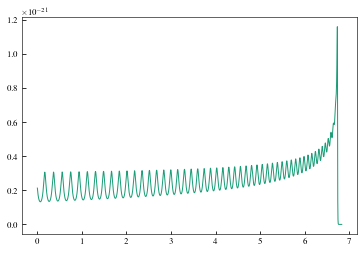

In [33]:
q = 4
chi1 = 0.6
chi2 = -0.4
ecc = 0.29
f_min = 13
M = 50
EccIC=-1
mean_anomaly = np.pi/2
t, hlm = seob.get_modes(q=q, chi1=chi1, chi2=chi2, eccentricity=ecc, eccentric_anomaly=mean_anomaly, f_min=f_min, M_fed=M, physical_units=True, EccIC=EccIC, save=False)
plt.plot(t, np.abs(hlm[(2, 2)]))

Truncate at `flow=20`

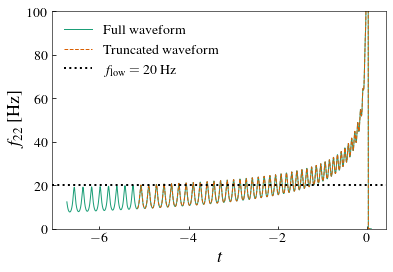

In [43]:
flow = 20
tpeak = peak_time_via_quadratic_fit(t, amplitude_using_all_modes(hlm))[0]
t = t - tpeak
dataDict = {"t": t, "hlm": {(2, 2): hlm[(2, 2)]}}
truncatedDict, gwecc_object = truncate_at_flow(
    flow=flow,
    method="Amplitude",
    dataDict=dataDict)
use_fancy_plotsettings()
plt.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)]))/2/np.pi, dataDict["t"]), label="Full waveform")
plt.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])), truncatedDict["t"])/2/np.pi, ls="--", c=colorsDict["brown"], label="Truncated waveform")
plt.ylim(0, 100)
plt.axhline(flow, ls=":", c="k", lw=2, label=f"$f_{{\mathrm{{low}}}}={flow}$ Hz")
plt.xlabel(labelsDict["t"])
plt.ylabel("$f_{22}$ [Hz]")
plt.legend()